# **Algoritma *K-Means***

### **Pengertiann K-Means Clustering**

K-Means Clustering adalah  salah satu algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa grup (disebut cluster) berdasarkan kemiripan fitur atau atributnya. Tujuan dari algoritma ini adalah untuk membagi data ke dalam k kelompok sedemikian rupa sehingga data dalam satu kelompok memiliki karakteristik yang mirip dan berbeda dari data di kelompok lain.



#### **Manfaat Clustering**
Clustering merupakan metode segmentasi data yang sangat bermanfaat dalam berbagai analisis dan prediksi permasalahan bisnis. Beberapa contohnya meliputi segmentasi pasar, strategi pemasaran (marketing), dan pemetaan zonasi wilayah.



Selain dalam dunia bisnis, clustering juga digunakan dalam berbagai bidang lain, seperti computer vision dan image processing, untuk mengidentifikasi objek dalam citra atau video.



Hasil clustering yang baik ditandai dengan tingkat kesamaan yang tinggi di dalam satu kelompok (intra-cluster similarity) dan tingkat kesamaan yang rendah antar kelompok (inter-cluster similarity). Kesamaan ini diukur secara numerik antara dua objek; semakin tinggi nilai kesamaan, maka semakin mirip kedua objek tersebut. Sebaliknya, jika nilai kesamaan rendah, berarti kedua objek sangat berbeda.



Kualitas hasil clustering sangat bergantung pada metode yang digunakan, serta pada pemilihan parameter dan representasi data yang tepat.










## **Silhouette Analysis**
Silhouette Analysis adalah metode evaluasi yang digunakan untuk menilai kualitas hasil clustering dengan cara mengukur seberapa mirip suatu data dengan klaster-nya sendiri dibandingkan dengan klaster lainnya. Metode ini memberikan nilai koefisien silhouette untuk masing-masing titik data.



Nilai Silhouette

 $$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$


**Penjelasan:**
- $a(i)$: Rata-rata jarak Euclidean dari titik data $i$ ke seluruh titik lain dalam klaster yang sama. Nilai ini mengukur tingkat kedekatan internal (intra-cluster cohesion) dan menunjukkan seberapa erat titik $i$ terhubung dengan anggota klasternya sendiri. Semakin kecil nilai $a(i)$, semakin baik kohesi titik terhadap klaster-nya.


- $b(i)$: Rata-rata jarak dari titik data $i$ ke seluruh titik dalam klaster lain yang paling dekat (dalam hal rata-rata jarak), atau dikenal sebagai nearest neighboring cluster. Nilai ini mengukur tingkat inter-cluster separation dan menggambarkan jarak terdekat titik $i$ terhadap klaster lain yang bukan miliknya.


- $s(i)$: Nilai Silhouette Score untuk titik data $i$, dihitung menggunakan formula:


$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$


Nilai ini memberikan indikator kuantitatif mengenai kualitas penempatan titik $i$ dalam klaster saat ini. Skor ini berada dalam rentang [-1, 1].


**Interpretasi Nilai $s(i)$:**

- Jika $s(i) \approx 1$: Titik data sangat sesuai dengan klaster-nya dan sangat tidak mirip dengan klaster lain. Ini menunjukkan penempatan yang sangat baik.


- Jika $s(i) \approx 0$: Titik data berada dekat dengan batas antara dua klaster dan berpotensi ambigu; tidak jelas lebih cocok di klaster saat ini atau klaster lain.


- Jika $s(i) \approx -1$: Titik data kemungkinan besar lebih cocok ditempatkan di klaster lain, karena lebih dekat dengan pusat klaster lain daripada dengan klaster-nya sendiri. Ini adalah indikasi dari klasterisasi yang buruk atau keliru.


Untuk mengevaluasi keseluruhan performa model clustering, digunakan rata-rata dari seluruh nilai $s(i)$ untuk semua titik data dalam dataset. Nilai rata-rata yang tinggi (mendekati 1) menunjukkan pembentukan klaster yang baik secara keseluruhan, sedangkan nilai mendekati 0 atau negatif menunjukkan masalah dalam struktur klaster yang terbentuk, seperti tumpang tindih antar klaster atau penempatan yang tidak tepat.




## Implementasi dengan menggunakan data Iris

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.3 MB/s eta 0:00:00


## Library yang digunakan

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database

In [3]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1d952496-dinaaa-269a.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_n1Ru1Ddse4sg_Gpi7Nb",
        database="defaultdb",
        port=27730
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel_b")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-e89c328-dinaaa-269a.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_GBbKfVRE1qvWkI6gU2s",
        database="iris_a",
        port=27730
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel_a")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          14.0         20.0           4.9          3.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa          20.0         15.0           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa          60.0         49.0          40.0         57.0
 10     Iris-setosa          36.0         25.0           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

## Data asli sebelum di normalisasi

Berikut adalah data sebelum normalisasi

In [4]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal_length  petal_width  sepal_length  sepal_width
          1.4          0.2           5.1          3.5
         14.0         20.0           4.9          3.0
          1.3          0.2           4.7          3.2
          1.5          0.2           4.6          3.1
          1.4          0.2           5.0          3.6
         20.0         15.0           5.4          3.9
          1.4          0.3           4.6          3.4
          1.5          0.2           5.0          3.4
         60.0         49.0          40.0         57.0
         36.0         25.0           4.9          3.1
          1.5          0.2           5.4          3.7
          1.6          0.2           4.8          3.4
          1.4          0.1           4.8          3.0
          1.1          0.1           4.3          3.0
         78.0         89.0           5.8          4.0
         15.0          9.9           5.7          4.4
          1.3          0.4           5.4          3.9
          1.4          0.3  

## Visualisasi data

### Visualisasi data asli tanpa menggunakan PCA

berikut adalah visualisasi data Iris 2 Dimensi tanpa menggunakan PCA

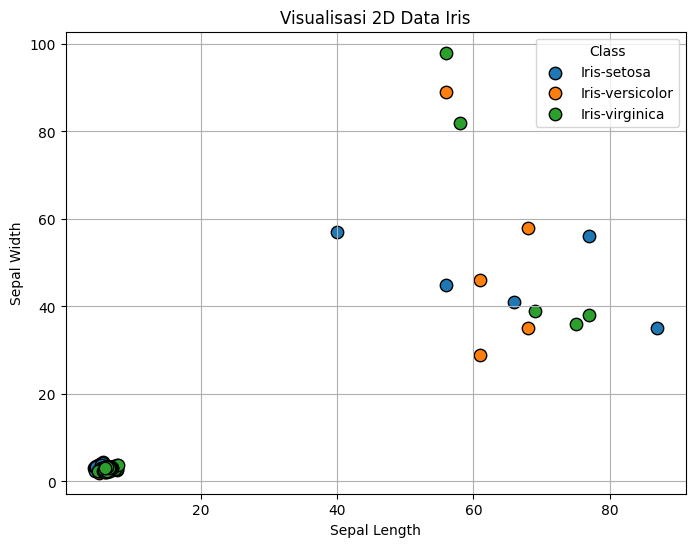

In [5]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()


di bawah ini adalah visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

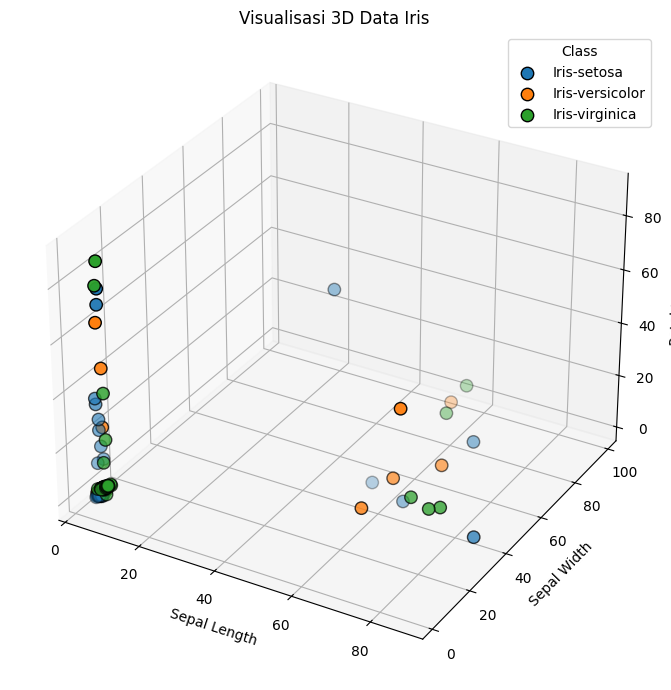

In [6]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal_length'],
        subset['sepal_width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

### Visualisasi data asli menggunakan PCA

dibawah ini adalah visualisasi data Iris secara 2 Dimensi menggunakan PCA

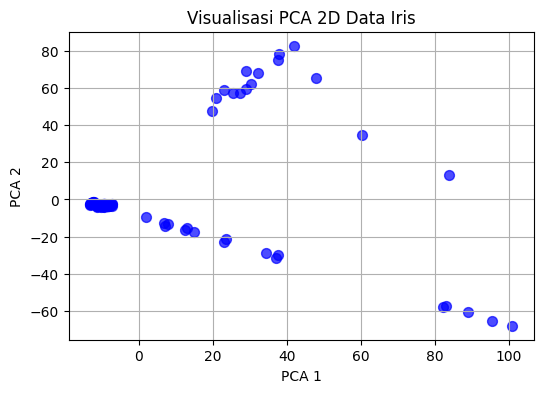

In [7]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

dibawah ini adalah visualisasi data Iris secara 3 Dimensi menggunakan PCA

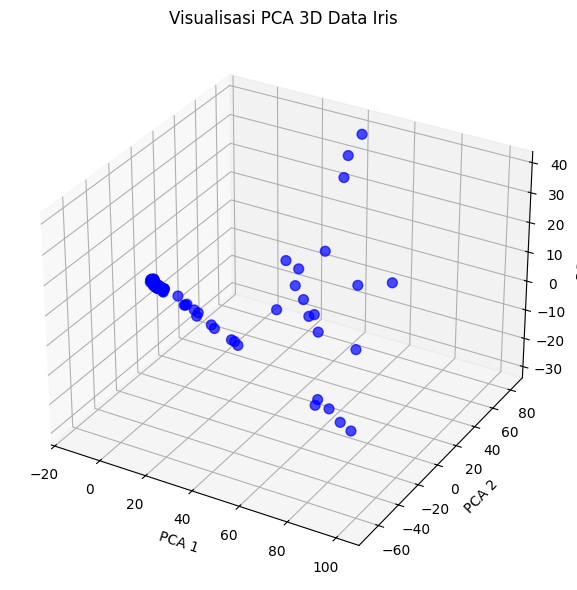

In [8]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


### **Preprocessing dan Reduksi Dimensi**

### **Standarisasi dengan menggunakan MinMaxScaler**

Dalam proses ini, saya juga menerapkan normalisasi menggunakan MinMaxScaler untuk menyamakan skala seluruh fitur dalam dataset. Langkah ini krusial karena masing-masing fitur memiliki rentang nilai yang bervariasi, yang dapat berdampak pada kinerja model machine learning — khususnya algoritma yang mengandalkan penghitungan jarak seperti K-Nearest Neighbor (KNN) atau Support Vector Machine (SVM).

MinMaxScaler bekerja dengan mentransformasikan nilai-nilai fitur ke dalam rentang 0 hingga 1, berdasarkan nilai minimum dan maksimum pada masing-masing fitur. Dengan skala yang seragam ini, algoritma dapat memproses setiap fitur secara lebih adil tanpa memberikan bobot berlebihan pada fitur dengan nilai yang lebih tinggi.

Setelah normalisasi diterapkan, saya melihat peningkatan stabilitas dan performa model. Dari pengalaman ini, saya menyadari bahwa normalisasi bukan sekadar prosedur teknis, melainkan langkah penting untuk menjaga integritas dan keandalan data dalam proses pembelajaran mesin.



In [11]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


dibawah ini adalah data hasil standarisasi menggunakan MinMaxScaler

In [19]:
print (scaled_features);

[[0.00454545 0.00102145 0.00967352 0.015625  ]
 [0.14772727 0.20326864 0.00725514 0.01041667]
 [0.00340909 0.00102145 0.00483676 0.0125    ]
 [0.00568182 0.00102145 0.00362757 0.01145833]
 [0.00454545 0.00102145 0.00846433 0.01666667]
 [0.21590909 0.15219612 0.01330109 0.01979167]
 [0.00454545 0.0020429  0.00362757 0.01458333]
 [0.00568182 0.00102145 0.00846433 0.01458333]
 [0.67045455 0.49948927 0.43168077 0.57291667]
 [0.39772727 0.25434116 0.00725514 0.01145833]
 [0.00568182 0.00102145 0.01330109 0.01770833]
 [0.00681818 0.00102145 0.00604595 0.01458333]
 [0.00454545 0.         0.00604595 0.01041667]
 [0.00113636 0.         0.         0.01041667]
 [0.875      0.90806946 0.01813785 0.02083333]
 [0.15909091 0.10010215 0.01692866 0.025     ]
 [0.00340909 0.00306435 0.01330109 0.01979167]
 [0.00454545 0.0020429  0.00967352 0.015625  ]
 [0.00795455 0.0020429  0.01692866 0.01875   ]
 [0.32954545 0.17262513 0.00967352 0.01875   ]
 [0.00795455 0.00102145 0.01330109 0.01458333]
 [0.00568182 

## Clustering menggunakan K-Means

### Clustering dengan 2 cluster dan Visualisasi data

Pada tahap ini, saya menerapkan algoritma K-Means clustering dengan jumlah 2 cluster, disertai perhitungan Inertia dan Silhouette Score sebagai evaluasi kinerja model. Setelah proses clustering dilakukan, saya juga membuat visualisasi dua dimensi dari dataset Iris untuk menggambarkan hasil pengelompokan data.



[2 Clusters] Inertia: 10.7077, Silhouette Score: 0.8116


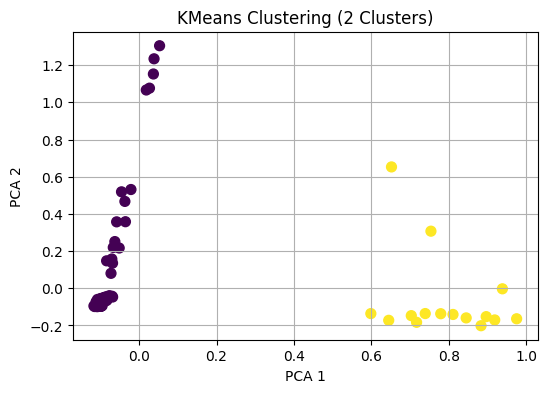

In [13]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Selain itu, saya juga melakukan visualisasi data Iris dalam bentuk tiga dimensi setelah proses clustering untuk memperoleh gambaran yang lebih jelas mengenai pemisahan antar cluster.

[2 Clusters] Inertia: 10.7077, Silhouette Score: 0.8116


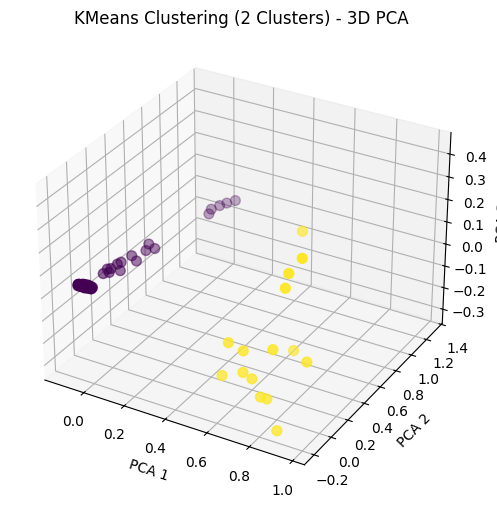

In [14]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

Pada tahap ini, saya menerapkan algoritma K-Means untuk melakukan clustering pada data Iris dengan jumlah cluster sebanyak tiga. Selain itu, saya menghitung nilai Inertia dan Silhouette Score untuk mengevaluasi kualitas hasil clustering. Selanjutnya, hasil pengelompokan divisualisasikan dalam bentuk dua dimensi untuk memberikan gambaran visual terhadap distribusi data.



[3 Clusters] Inertia: 3.3994, Silhouette Score: 0.8621


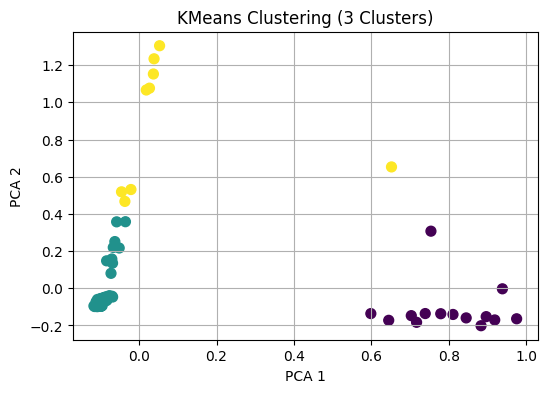

In [15]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 3.3994, Silhouette Score: 0.8621


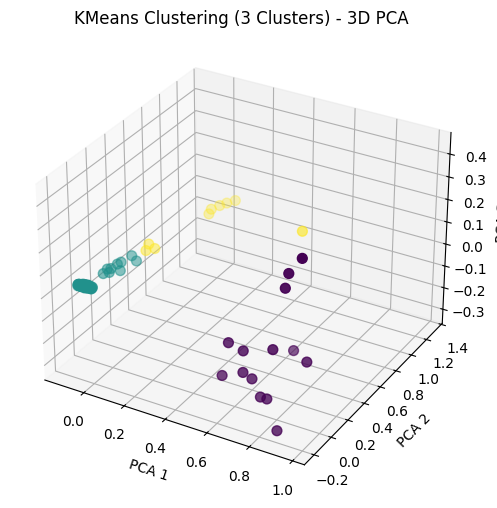

In [16]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

Pada tahap ini, saya menerapkan algoritma K-Means untuk melakukan proses clustering pada dataset Iris dengan jumlah cluster sebanyak empat. Evaluasi hasil clustering dilakukan melalui perhitungan nilai Inertia dan Silhouette Score. Selanjutnya, hasil pengelompokan divisualisasikan dalam bentuk dua dimensi guna memperoleh pemahaman visual terhadap distribusi masing-masing cluster.

[4 Clusters] Inertia: 2.1250, Silhouette Score: 0.8464


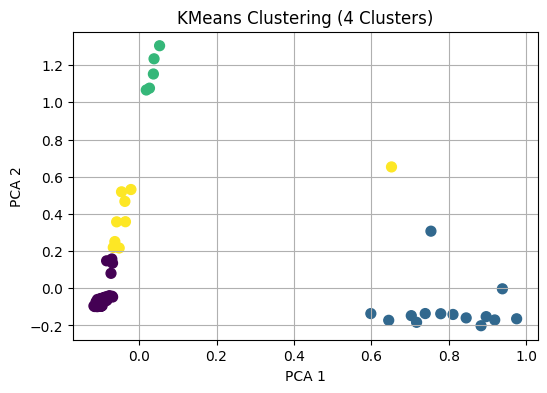

In [17]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[4 Clusters] Inertia: 2.1250, Silhouette Score: 0.8464


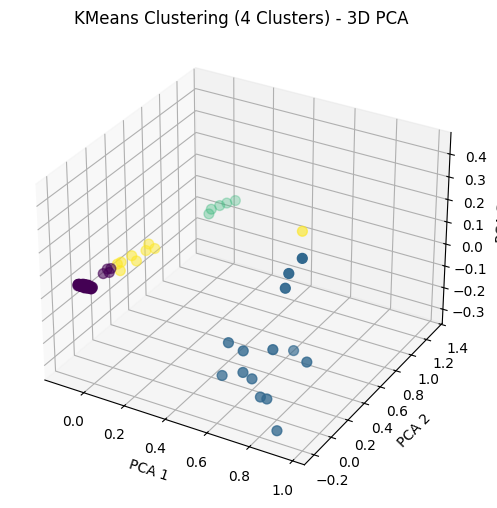

In [18]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
